In [1]:
#CODSOFT PROJECT 
#ML TASK 1
#MOVIE GENRE CLASSIFICATION


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Loading movie genre dataset
data_filepath = "./Genre Classification Dataset/train_data.txt"
movie_data = pd.read_csv(data_filepath, sep=':::', names=['MovieTitle', 'Category', 'Synopsis'], engine='python')
print(movie_data.head(5))
print(movie_data.info())
print(movie_data.describe())

                           MovieTitle    Category  \
1       Oscar et la dame rose (2009)       drama    
2                       Cupid (1997)    thriller    
3   Young, Wild and Wonderful (1980)       adult    
4              The Secret Sin (1915)       drama    
5             The Unrecovered (2007)       drama    

                                            Synopsis  
1   Listening in to a conversation between his do...  
2   A brother and sister with a past incestuous r...  
3   As the bus empties the students for their fie...  
4   To help their unemployed father make ends mee...  
5   The film's title refers not only to the un-re...  
<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   MovieTitle  54214 non-null  object
 1   Category    54214 non-null  object
 2   Synopsis    54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB
None
   

In [11]:
# Dropping irrelevant columns
movie_data.drop('Lifestyle', axis=1, inplace=True, errors='ignore')
print("Columns in the dataset:", movie_data.columns)

Columns in the dataset: Index(['MovieTitle', 'Category', 'Synopsis'], dtype='object')


In [13]:
# Checking for missing values
print("Null values in the dataset:")
print(movie_data.isnull().sum())

Null values in the dataset:
MovieTitle    0
Category      0
Synopsis      0
dtype: int64


In [17]:
genre_distribution = movie_data['Category'].value_counts()
print("Genre Distribution:")
print(genre_distribution)

imbalance_ratio = genre_distribution.min() / genre_distribution.max()
print("Imbalance Ratio:", imbalance_ratio)

Genre Distribution:
Category
drama           13613
documentary     13096
comedy           7447
short            5073
horror           2204
thriller         1591
action           1315
western          1032
reality-tv        884
family            784
adventure         775
music             731
romance           672
sci-fi            647
adult             590
crime             505
animation         498
sport             432
talk-show         391
fantasy           323
mystery           319
musical           277
biography         265
history           243
game-show         194
news              181
war               132
Name: count, dtype: int64
Imbalance Ratio: 0.009696613531183427


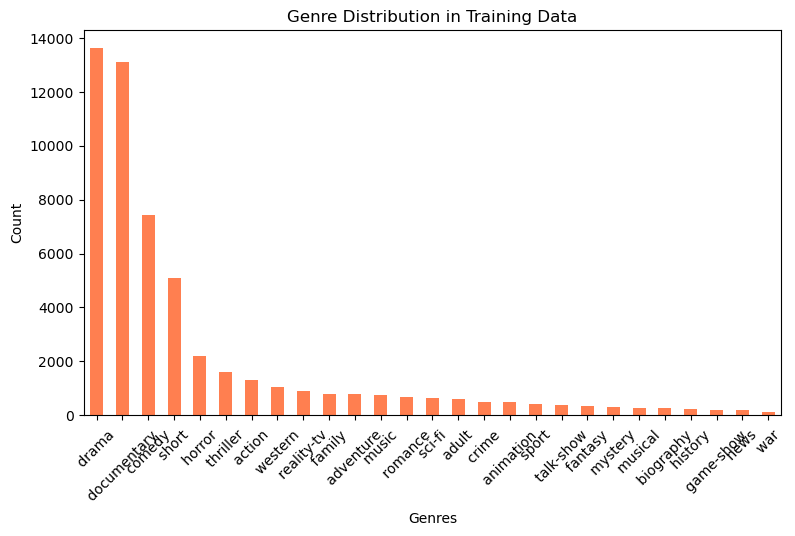

In [19]:
# Visualizing class distribution
plt.figure(figsize=(9, 5))
genre_distribution.plot(kind='bar', color='coral')
plt.title('Genre Distribution in Training Data')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [21]:
# Loading test and validation datasets
test_filepath = "./Genre Classification Dataset/test_data.txt"
test_data = pd.read_csv(test_filepath, sep=':::', names=['ID', 'MovieTitle', 'Synopsis'], engine='python')

In [28]:
print(test_data.head(5))
print(test_data.info())
test_data.drop('Lifestyle', axis=1, inplace=True, errors='ignore')

solution_filepath = "./Genre Classification Dataset/test_data_solution.txt"
solution_data = pd.read_csv(solution_filepath, sep=':::', names=['ID', 'MovieTitle', 'Genre'], engine='python')
solution_data.drop(columns=['ID'], inplace=True)
solution_data.rename(columns={'Genre': 'True_Category'}, inplace=True)
print(solution_data.head(3))

   ID                     MovieTitle  \
0   1          Edgar's Lunch (1998)    
1   2      La guerra de papá (1977)    
2   3   Off the Beaten Track (2010)    
3   4        Meu Amigo Hindu (2015)    
4   5             Er nu zhai (1955)    

                                            Synopsis  
0   L.R. Brane loves his life - his car, his apar...  
1   Spain, March 1964: Quico is a very naughty ch...  
2   One year in the life of Albin and his family ...  
3   His father has died, he hasn't spoken with hi...  
4   Before he was known internationally as a mart...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          54200 non-null  int64 
 1   MovieTitle  54200 non-null  object
 2   Synopsis    54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB
None
      MovieTitle                                      True_Categor

In [30]:
# Data cleaning and preprocessing
import re
import nltk
import string
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
stop_words_set = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r"[^a-zA-Z]", ' ', text)
    text = ''.join([char for char in text if char not in string.punctuation])
    words = nltk.word_tokenize(text)
    filtered_words = [stemmer.stem(word) for word in words if word not in stop_words_set]
    return ' '.join(filtered_words)

movie_data['Cleaned_Synopsis'] = movie_data['Synopsis'].apply(preprocess_text)
test_data['Cleaned_Synopsis'] = test_data['Synopsis'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
# Feature extraction using TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=2500)
X_train = vectorizer.fit_transform(movie_data['Cleaned_Synopsis'])
X_test = vectorizer.transform(test_data['Cleaned_Synopsis'])

In [33]:
# Splitting training data
from sklearn.model_selection import train_test_split
y_train = movie_data['Category']
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.25, random_state=0)


In [36]:
# Training models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [38]:
# Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_split, y_train_split)
y_pred_nb = nb_model.predict(X_val_split)
print("Naive Bayes Validation Accuracy:", accuracy_score(y_val_split, y_pred_nb))
print(classification_report(y_val_split, y_pred_nb))


Naive Bayes Validation Accuracy: 0.5142393389405342
               precision    recall  f1-score   support

      action        0.56      0.09      0.16       323
       adult        0.67      0.10      0.17       141
   adventure        0.67      0.07      0.13       195
   animation        0.00      0.00      0.00       132
   biography        0.00      0.00      0.00        70
      comedy        0.55      0.43      0.48      1865
       crime        0.00      0.00      0.00       112
 documentary        0.55      0.87      0.68      3219
       drama        0.45      0.82      0.58      3423
      family        0.00      0.00      0.00       210
     fantasy        0.00      0.00      0.00        81
   game-show        1.00      0.24      0.39        41
     history        0.00      0.00      0.00        57
      horror        0.69      0.34      0.45       540
       music        0.66      0.14      0.23       196
     musical        0.00      0.00      0.00        75
     mystery

In [40]:
# Logistic Regression model
lr_model = LogisticRegression(multi_class='multinomial', solver='saga')
lr_model.fit(X_train_split, y_train_split)
y_pred_lr = lr_model.predict(X_val_split)
print("Logistic Regression Validation Accuracy:", accuracy_score(y_val_split, y_pred_lr))
print(classification_report(y_val_split, y_pred_lr))


Logistic Regression Validation Accuracy: 0.5826324332300428
               precision    recall  f1-score   support

      action        0.43      0.26      0.32       323
       adult        0.71      0.35      0.47       141
   adventure        0.51      0.13      0.21       195
   animation        0.46      0.08      0.14       132
   biography        0.00      0.00      0.00        70
      comedy        0.53      0.60      0.56      1865
       crime        0.17      0.03      0.05       112
 documentary        0.67      0.84      0.74      3219
       drama        0.55      0.77      0.64      3423
      family        0.42      0.07      0.12       210
     fantasy        0.00      0.00      0.00        81
   game-show        0.89      0.59      0.71        41
     history        0.00      0.00      0.00        57
      horror        0.64      0.60      0.62       540
       music        0.59      0.43      0.50       196
     musical        0.67      0.05      0.10        75
    

In [41]:
# Making predictions on test data
test_data['NB_Predicted_Genre'] = nb_model.predict(X_test)
test_data['LR_Predicted_Genre'] = lr_model.predict(X_test)


In [52]:
# Align indices for comparison
solution_data = solution_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

# Comparing predictions with true categories
correct_nb = (test_data['NB_Predicted_Genre'] == solution_data['True_Category']).sum()
correct_lr = (test_data['LR_Predicted_Genre'] == solution_data['True_Category']).sum()

print("Correct predictions by Naive Bayes:", correct_nb)
print("Correct predictions by Logistic Regression:", correct_lr)


Correct predictions by Naive Bayes: 0
Correct predictions by Logistic Regression: 0


In [54]:
print("Correct predictions by Naive Bayes:", correct_nb)
print("Correct predictions by Logistic Regression:", correct_lr)


Correct predictions by Naive Bayes: 0
Correct predictions by Logistic Regression: 0


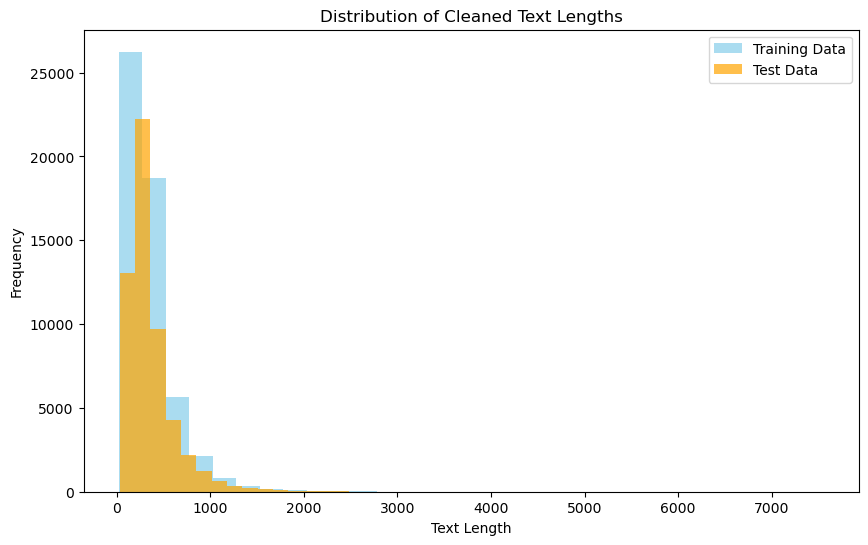

In [56]:
# Visualizing text length distributions
plt.figure(figsize=(10, 6))
plt.hist(movie_data['Cleaned_Synopsis'].apply(len), bins=30, color='skyblue', alpha=0.7, label='Training Data')
plt.hist(test_data['Cleaned_Synopsis'].apply(len), bins=30, color='orange', alpha=0.7, label='Test Data')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Cleaned Text Lengths')
plt.legend()
plt.show()